# Using line and boxplots to visualize time series data

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
air_traffic_data = pd.read_csv("data/SF_Air_Traffic_Passenger_Statistics_Transformed.csv")

In [4]:
air_traffic_data

,Date,Total Passenger Count
0,200601,2448889
1,200602,2223024
2,200603,2708778
3,200604,2773293
4,200605,2829000
...,...,...
127,201608,5110638
128,201609,4543759
129,201610,4571997
130,201611,4266481


In [5]:
# Convert the Date column from the int data type to datetime type

air_traffic_data['Date'] = pd.to_datetime(air_traffic_data['Date'], format='%Y%m')

In [6]:
# Set the index of the dataframe
air_traffic_data.set_index('Date', inplace=True)

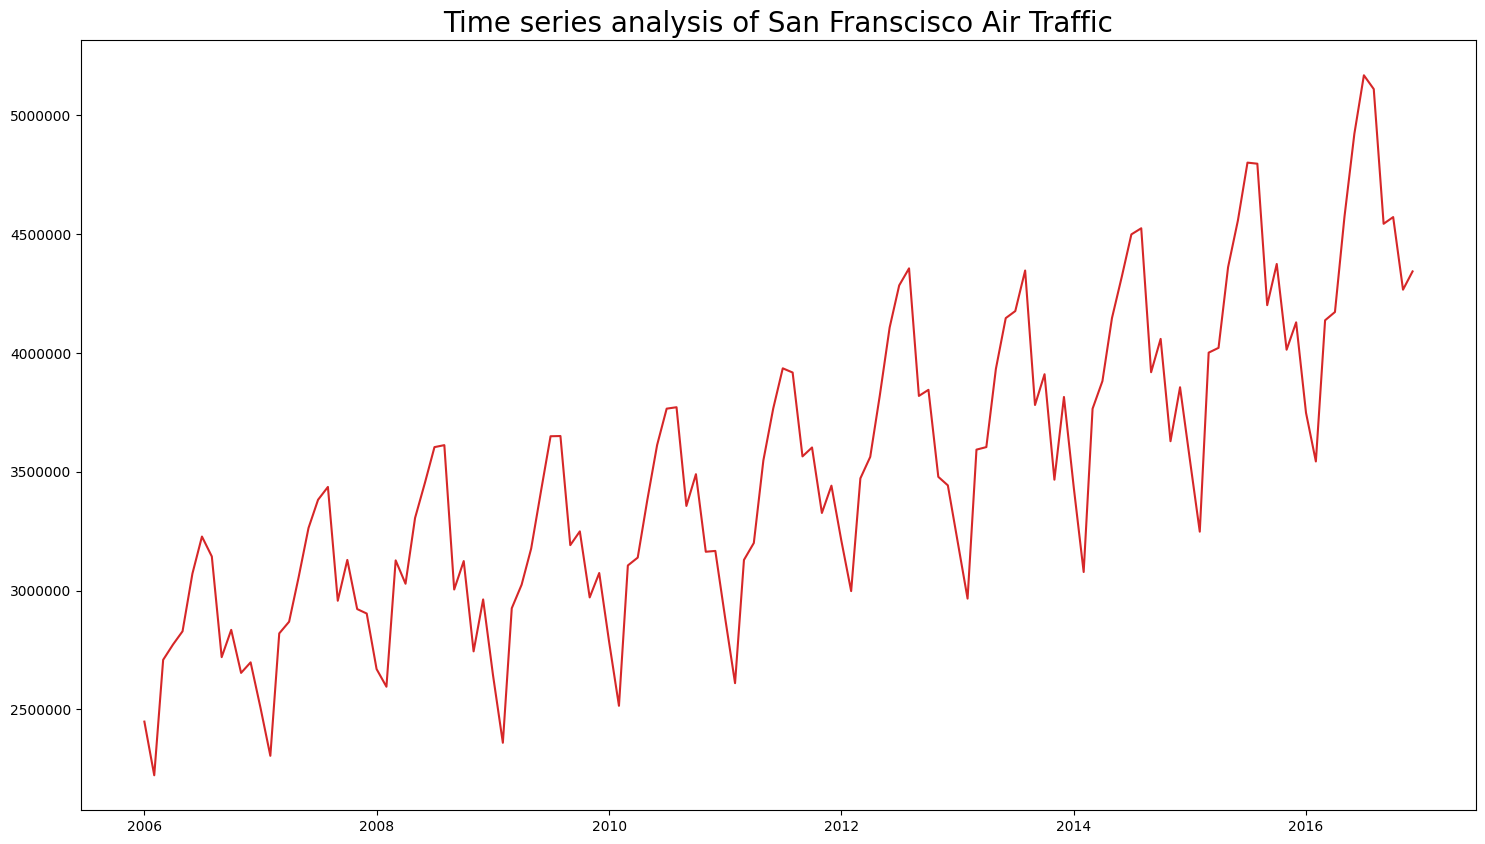

In [9]:
plt.figure(figsize=(18, 10))

plt.plot(air_traffic_data.index, air_traffic_data['Total Passenger Count'], color='tab:red')

plt.title('Time series analysis of San Franscisco Air Traffic', fontsize=20)

plt.ticklabel_format(style='plain', axis='y')

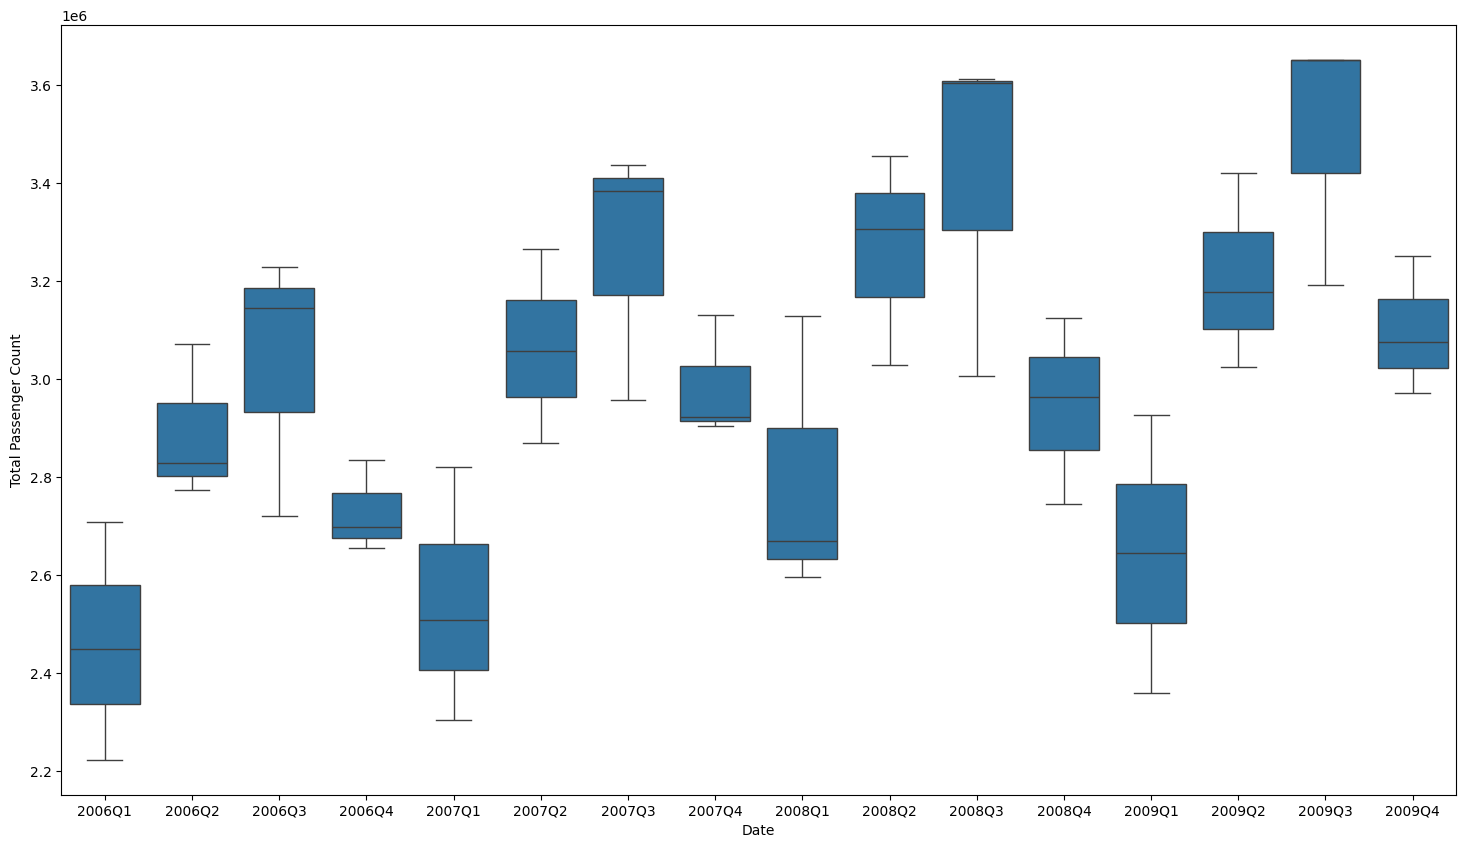

In [11]:
# Plot the timeseries data on a boxplot 

plt.figure(figsize=(18,10))

data_subset = air_traffic_data[air_traffic_data.index < '2010-01-01']

ax = sns.boxplot(data_subset, x=pd.PeriodIndex(data_subset.index, freq='Q'), y='Total Passenger Count')

# Spotting patterns in time series

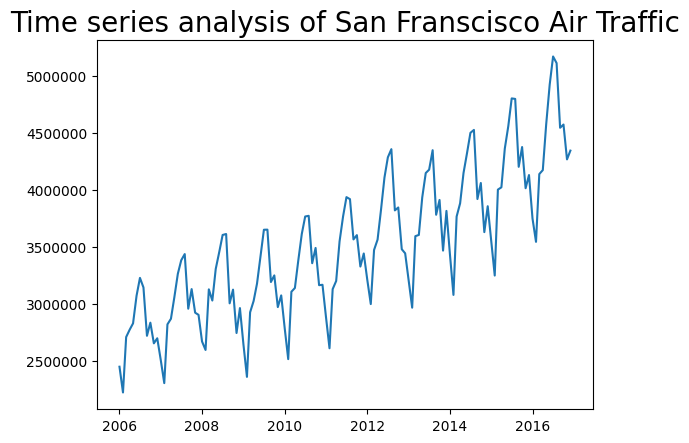

In [12]:
plt.plot(air_traffic_data.index, air_traffic_data['Total Passenger Count'])

plt.title('Time series analysis of San Franscisco Air Traffic', fontsize=20)

plt.ticklabel_format(style='plain', axis='y')

# Performing time series data decomposition

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

weather_data = pd.read_csv('./data/DailyDelhiClimate.csv')

weather_data['date'] = pd.to_datetime(weather_data['date'], format="%d/%m/%Y")

weather_data.set_index('date', inplace=True)

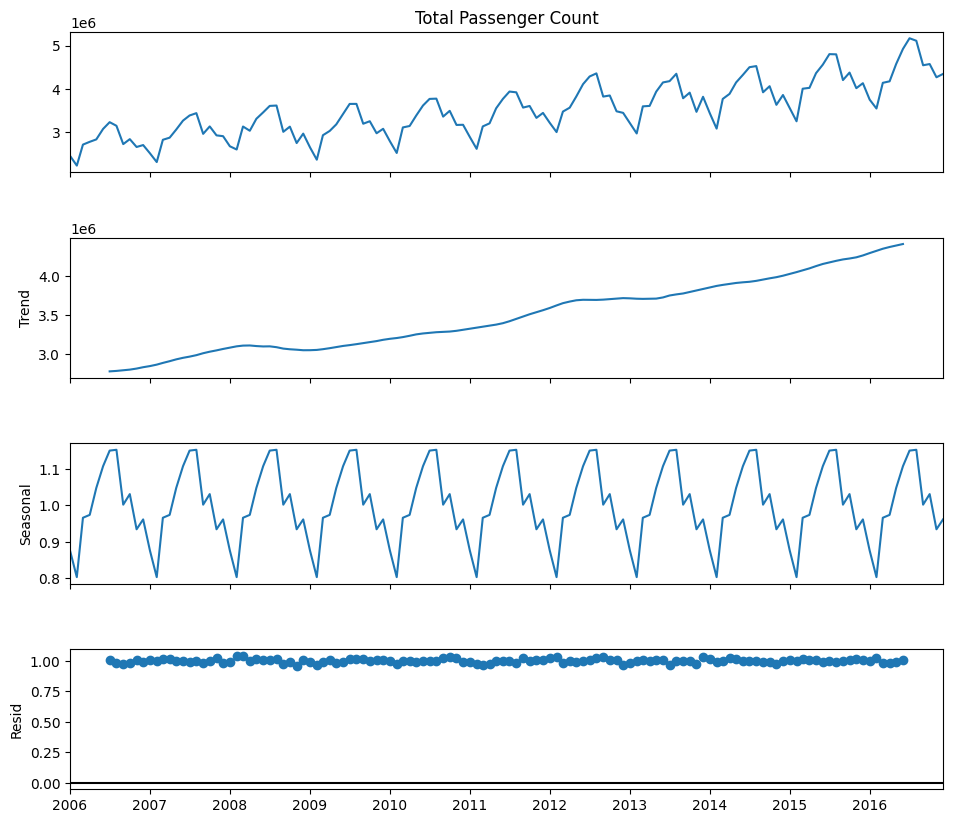

In [17]:
decomposition_multi = seasonal_decompose(air_traffic_data['Total Passenger Count'],
                                         model='multiplicative', period=12)

fig = decomposition_multi.plot()

fig.set_size_inches((10,9))

plt.show()

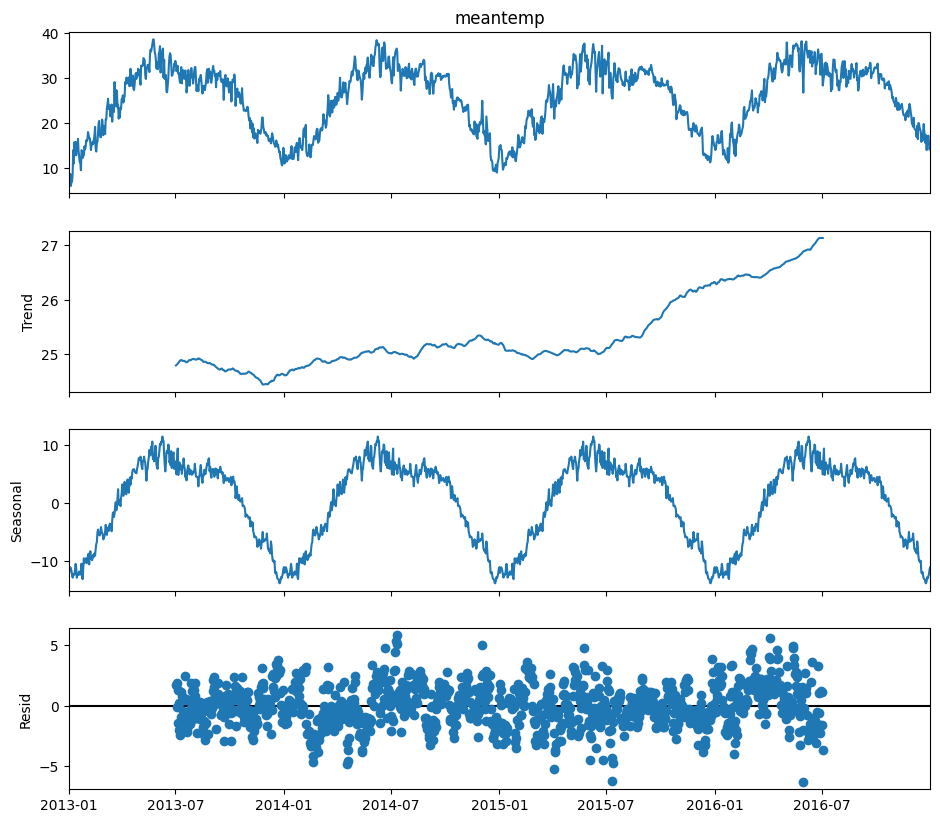

In [18]:
decomposition_add = seasonal_decompose(weather_data['meantemp'], model='additive', period=365)

fig = decomposition_add.plot()

fig.set_size_inches((10,9))

plt.show()

# Performing smoothing - moving average

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 

In [7]:
stock_data = pd.read_csv('./data/MTNOY.csv')
stock_data = stock_data[['Date', 'Close']]

stock_data.head()

,Date,Close
0,2010-02-01,14.70
1,2010-02-02,14.79
2,2010-02-03,14.60
3,2010-02-04,14.10
4,2010-02-05,14.28


In [8]:
stock_data.shape

(1490, 2)

In [9]:
# Set Date as the index of the dataframe
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format="%Y-%m-%d")
stock_data.set_index('Date', inplace=True)

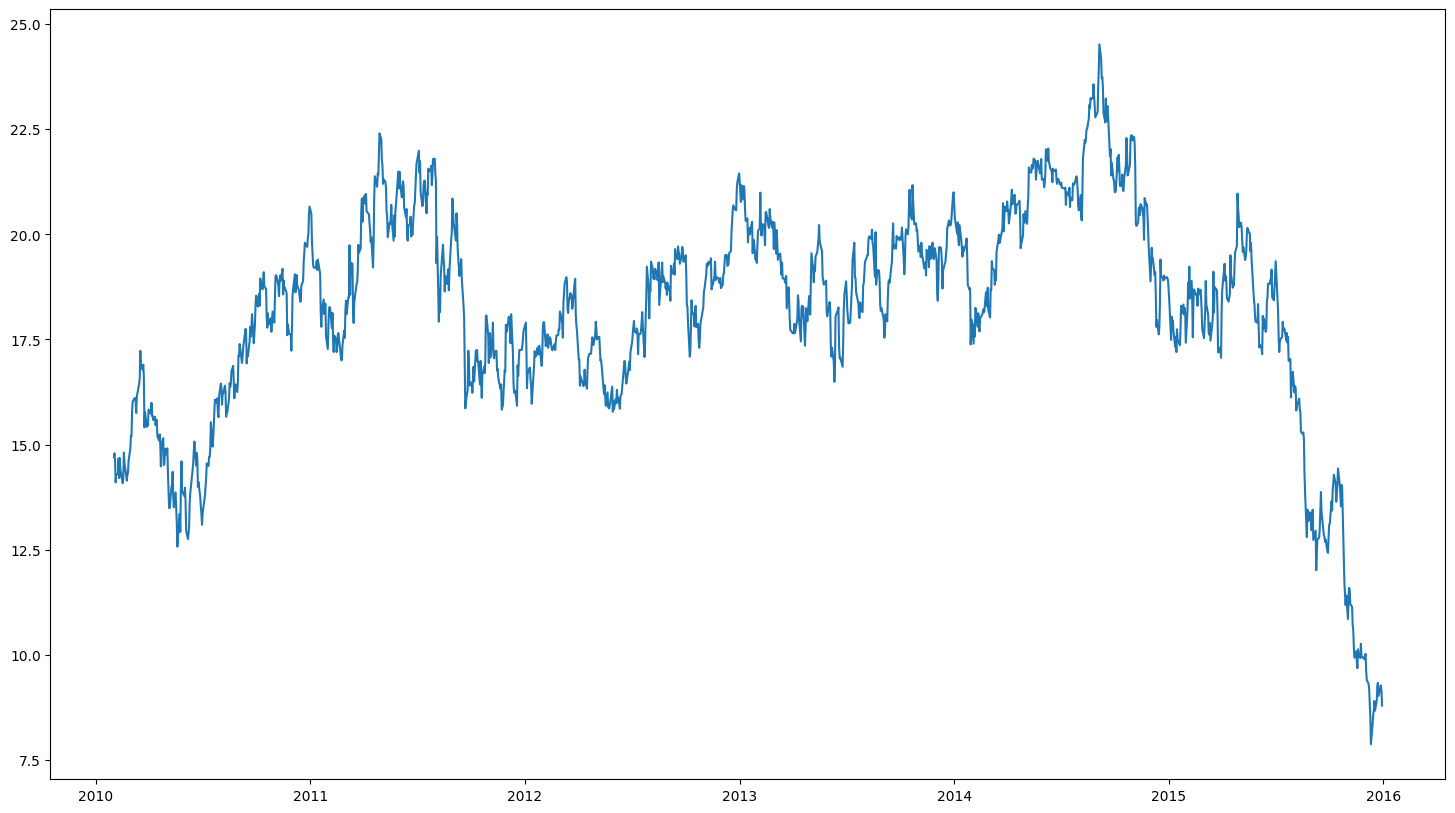

In [10]:
plt.figure(figsize=(18, 10))
plt.plot(stock_data.index, stock_data['Close'], color='tab:blue')

In [11]:
moving_data = stock_data.rolling(window=4)

moving_average_data = moving_data.mean()

moving_average_data.head()

,Close
Date,
2010-02-01,NaN
2010-02-02,NaN
2010-02-03,NaN
2010-02-04,14.5475
2010-02-05,14.4425


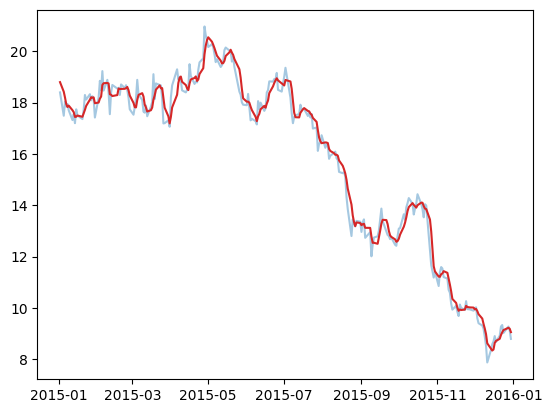

In [12]:
stock_data_subset = stock_data[stock_data.index >= '2015-01-01']
moving_average_data_subbset = moving_average_data[moving_average_data.index >= '2015-01-01']

plt.plot(stock_data_subset.index, stock_data_subset['Close'], color='tab:blue', alpha=0.4)
plt.plot(moving_average_data_subbset.index, moving_average_data_subbset['Close'], color='tab:red')

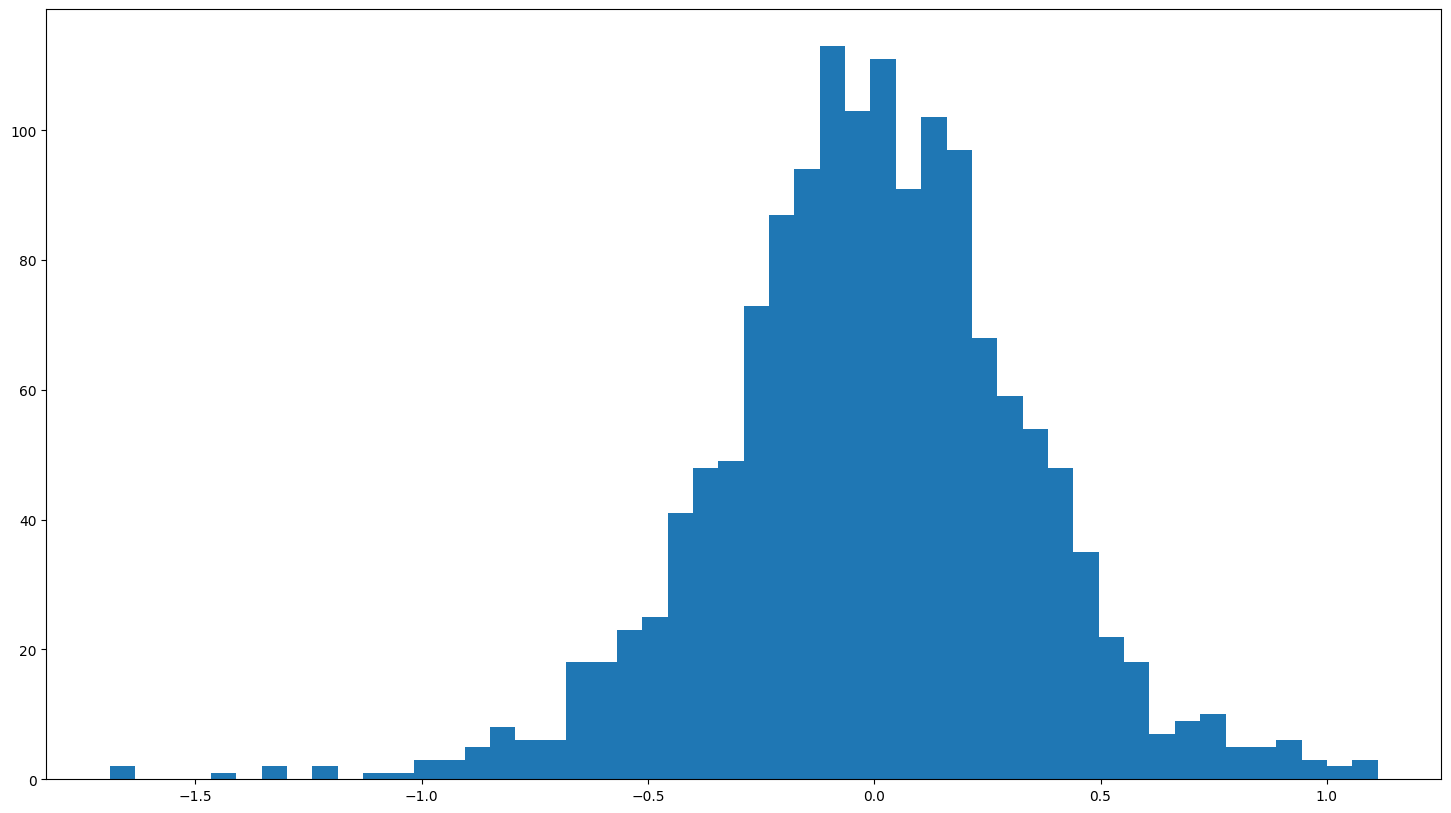

In [13]:
# Calculate the residual and plot the residual on histogram

plt.figure(figsize=(18, 10))

residuals = stock_data - moving_average_data
plt.hist(residuals, bins=50)
plt.show()

In [14]:
# Examine the residuals with very high values

percentile_90 = np.nanpercentile(abs(residuals['Close']), 90)
residuals[abs(residuals['Close']) >= percentile_90]


,Close
Date,
2010-03-18,0.5750
2010-03-25,-1.0125
2010-05-05,-0.5700
2010-05-06,-0.6625
2010-05-20,-0.6975
...,...
2015-09-17,0.5875
2015-10-26,-1.2250
2015-10-27,-1.3100
